<a href="https://colab.research.google.com/github/vuongngo1234/final-project/blob/main/projectcuoiky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

#mount drive vao code
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#thêm data và xử lý data
folder = '/content/drive/MyDrive/tien/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('5000vnd'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('10000vnd'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('20000vnd'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('50000vnd'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('100000vnd'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('200000vnd'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('500000vnd'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
       
    
    
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('tien_photos.npy', photos)
save('tien_labels.npy', labels)

(176, 200, 200, 3) (176,)


In [ ]:

# lưu dữ liệu vừa xử lý
save('luuhinhtien.npy',photos)
save('luutentien.npy',labels)

In [ ]:

x_train = np.load('/content/luuhinhtien.npy')
y_train = np.load('/content/luutentien.npy')

In [ ]:
#tạo model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#train
history = model.fit(photos, labels, validation_split=0.1, epochs=30, verbose=1)
model.evaluate(photos,labels)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 25, 25, 128)     

[3.803619146347046, 0.9318181872367859]

In [ ]:
#lưu model
model.save('tien.h5')

In [ ]:
model.evaluate(photos,labels)

6/6 [==============================] - 0s 18ms/step - loss: 3.8036 - accuracy: 0.9318


[3.803619146347046, 0.9318181872367859]

In [ ]:
model.save('tien.h5')

In [ ]:
classes = ["5000vnd","10000vnd","20000vnd","50000vnd","100000vnd","200000vnd","500000vnd"]

1/1 [==============================] - 0s 101ms/step
[[0.10412548 0.11686411 0.09614325 0.09664559 0.12092518 0.1138778
  0.104506   0.09406771 0.08640916 0.0664358 ]]


'100000vnd'

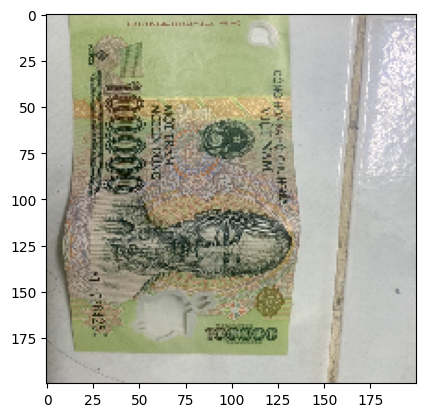

In [ ]:
img = load_img('/content/drive/MyDrive/tien/100000vnd (1).jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3) 
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 24ms/step
[[0.1034991  0.10823499 0.11350102 0.10459597 0.1115234  0.10862858
  0.09951524 0.0939546  0.08571471 0.07083234]]


'20000vnd'

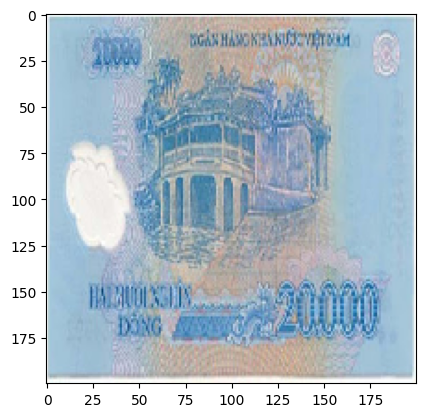

In [ ]:
img = load_img('/content/drive/MyDrive/tien/20000vnd (1).jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3) 
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 34ms/step
[[0.10202087 0.11126746 0.10057597 0.10313051 0.11231175 0.11586563
  0.08391895 0.08950275 0.09035154 0.09105461]]


'200000vnd'

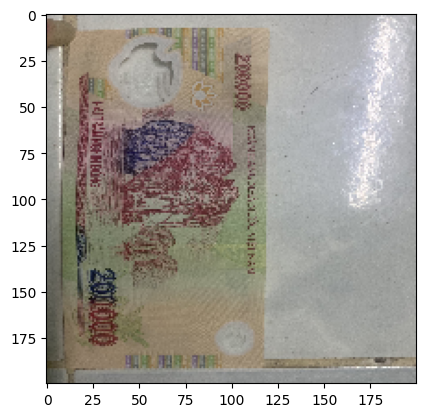

In [ ]:
img = load_img('/content/drive/MyDrive/tien/200000vnd (7).jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3) 
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 18ms/step
[[0.14334309 0.08354089 0.06573667 0.22175701 0.06475737 0.04935108
  0.05222559 0.13607354 0.09852533 0.08468942]]


'50000vnd'

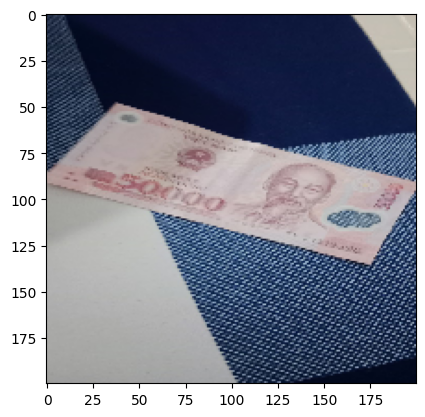

In [ ]:
img = load_img('/content/drive/MyDrive/tien/50000vnd (108).jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3) 
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 19ms/step
[[0.2260792  0.07539711 0.05538848 0.16392979 0.0798861  0.07455056
  0.05626663 0.0970295  0.07261251 0.09886013]]


'5000vnd'

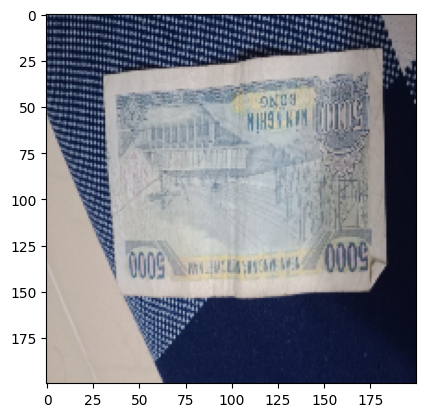

In [ ]:
img = load_img('/content/drive/MyDrive/tien/5000vnd (141).jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3) 
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 18ms/step
[[0.10191321 0.12802589 0.10151564 0.11140288 0.10593527 0.10264803
  0.07437608 0.09319392 0.09274697 0.08824209]]


'10000vnd'

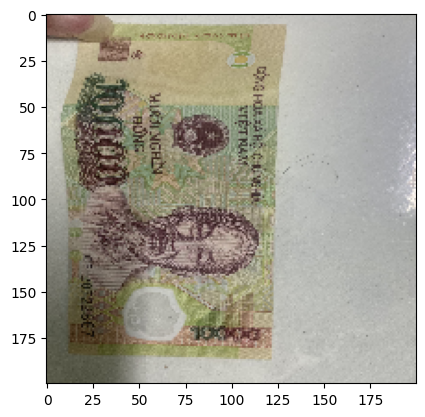

In [ ]:
img = load_img('/content/drive/MyDrive/tien/10000vnd (184).jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3) 
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]